In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
data = pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [21]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [22]:
#droping unnecessary features from the dataset
data=data.drop(['Unnamed: 0', 'key', 'pickup_datetime'],axis=1)

In [23]:
data.isna().sum()


fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [24]:
data.shape


(200000, 6)

In [25]:
data.dropna(inplace=True)


In [26]:
data.isna().sum()



fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

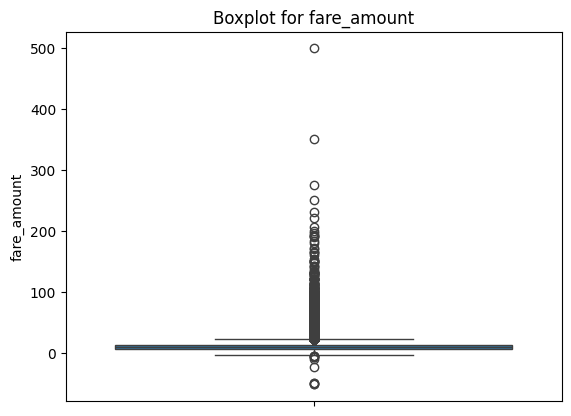

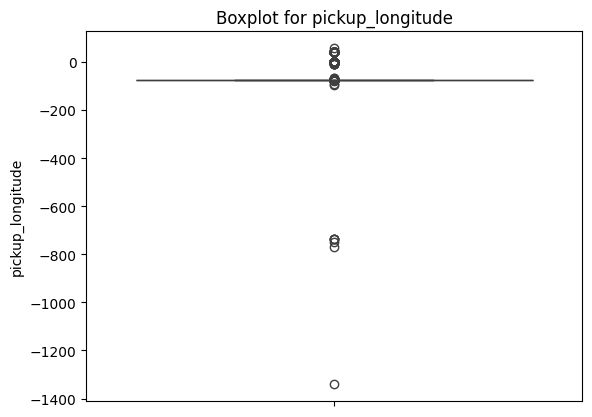

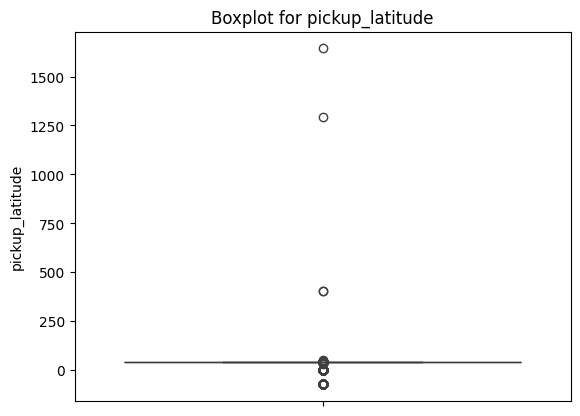

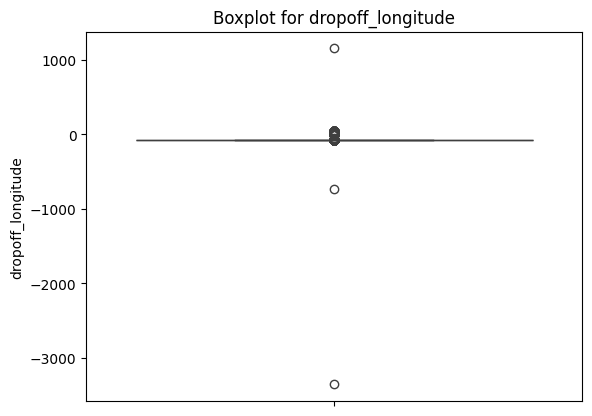

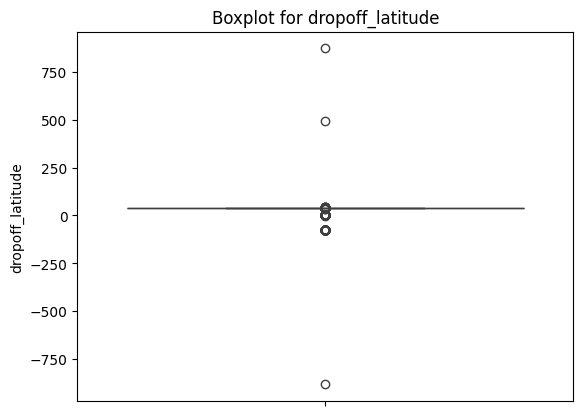

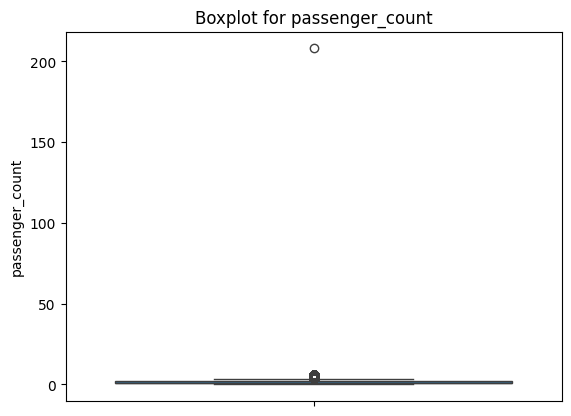

In [27]:
for i in data.columns:  #iterating over the data frame to get boxplots of each feature for outliers
    sns.boxplot(data=data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()


In [28]:
# for i in data.columns:
#     sns.boxplot(data=data[i])
#     plt.title(f'Boxplot for {i}')
#     plt.show()


<Axes: >

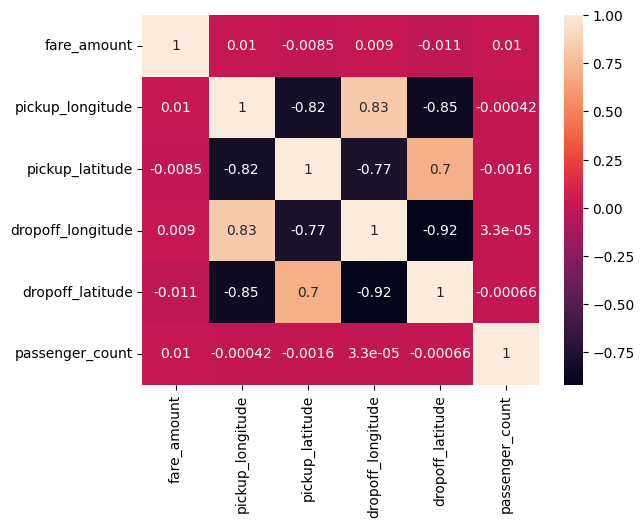

In [29]:
sns.heatmap(data.corr(),annot=True) #correaltion Matrix


In [30]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [31]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)
y = data[:, 0]

x = data[:, 1:]

In [34]:
x

array([[0.90600001, 0.06677805, 0.72782548, 0.5258549 , 0.00480769],
       [0.90600392, 0.06677215, 0.72782654, 0.52587035, 0.00480769],
       [0.90599627, 0.06677945, 0.72783367, 0.52588307, 0.00480769],
       ...,
       [0.90600988, 0.0667886 , 0.72785664, 0.52583745, 0.00961538],
       [0.90600193, 0.06677054, 0.72782909, 0.52583906, 0.00480769],
       [0.90601104, 0.06676741, 0.72782858, 0.52588088, 0.00480769]])

In [35]:
from sklearn.model_selection import train_test_split #splitting in train - test (as test_size is 0.3 therefore its 30%(test)-70%(train) ratio)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
x_test

array([[0.90601217, 0.06679745, 0.72783046, 0.52587769, 0.00480769],
       [0.90600561, 0.06677072, 0.72782631, 0.52587575, 0.00480769],
       [0.90601008, 0.06679523, 0.7278257 , 0.52587624, 0.00480769],
       ...,
       [0.90600866, 0.06677761, 0.72782628, 0.52585591, 0.00480769],
       [0.90603646, 0.06680325, 0.72782864, 0.52586879, 0.00480769],
       [0.90600345, 0.06677901, 0.72783067, 0.52589237, 0.00480769]])

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
# y_pred


Mean Squared Error (MSE): 96.61410931675427
Root Mean Squared Error (RMSE): 9.829247647544255
R-squared (R²): 0.00028616279030757585


In [37]:
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
#for mse and rmse lower the values better the model
r2 = r2_score(y_test, y_pred)
#for r2 higher values indicate better modelv
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.0003182272433778356
Root Mean Squared Error (RMSE): 0.017838924950171062
R-squared (R²): 0.00028616279030746483


Mean Squared Error (MSE): 96.61410931675428
Root Mean Squared Error (RMSE): 9.829247647544255
R-squared (R²): 0.00028616279030746483

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) #n_estimators indiacte number of decision trees
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf

array([0.1106906, 0.1106906, 0.1106906, ..., 0.1106906, 0.1106906,
       0.1106906])

In [39]:
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
#you can use np.sqrt(mse) or root_mean_squared_error(y_test, y_pred) directly to calculate rmse
r2 = r2_score(y_test, y_pred_rf)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.00010754550765681544
Root Mean Squared Error (RMSE): 0.010370415018542673
R-squared (R²): 0.6621447900153363
